<a href="https://colab.research.google.com/github/pawanU02/OYO_Rooms_Analysis/blob/main/oyo_hotel_rooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
OYO is a popular chain of budget hotels that has a presence in various locations across the world. The dataset contains five columns: Hotel_name, Location, Price, Discount, and Rating.

The Hotel_name column contains the name of the OYO hotel, while the Location column contains the location of the hotel. The Price column contains the price per night for the hotel room, while the Discount column contains the discount (if any) offered by OYO on the room. The Rating column contains the rating given to the hotel by customers who have previously stayed there.

This dataset can be useful for various purposes, including market analysis, pricing strategy, and consumer behavior analysis. By analyzing the dataset, one can gain insights into the popularity of OYO hotels in different locations, the pricing strategy of the company, and the factors that influence customer ratings.

In [ ]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
oyo_rooms = pd.read_csv('OYO_HOTEL_ROOMS.csv')
oyo_rooms.head()

,Unnamed: 0,Hotel_name,Location,Price,Discount,Rating
0,0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.0,65% off,104.0
1,1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.0,65% off,410.0
2,2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.0,64% off,879.0
3,3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.0,66% off,75.0
4,4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,65% off,686.0


### Data Exploration

In [ ]:
# shape
oyo_rooms.shape

(460, 6)

In [ ]:
# information
oyo_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  460 non-null    int64  
 1   Hotel_name  460 non-null    object 
 2   Location    460 non-null    object 
 3   Price       418 non-null    float64
 4   Discount    418 non-null    object 
 5   Rating      438 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 21.7+ KB


In [ ]:
# describe
oyo_rooms.describe()

,Unnamed: 0,Price,Rating
count,460.000000,418.000000,438.000000
mean,229.500000,1290.191388,620.636986
std,132.934821,550.144661,934.922813
min,0.000000,449.000000,1.000000
25%,114.750000,909.250000,61.250000
50%,229.500000,1206.000000,266.500000
75%,344.250000,1497.500000,826.750000
max,459.000000,4069.000000,7398.000000


**Missing Values**

- Price: 42 (9.13% of total)
- Discount: 42 (9.13% of total)
- Rating: 22 (4.78% of total)

In [ ]:
# any missing value
oyo_rooms.isnull().sum()

,0
Unnamed: 0,0
Hotel_name,0
Location,0
Price,42
Discount,42
Rating,22


In [ ]:
# any duplicates
oyo_rooms.duplicated().sum()

0

### Data Cleaning & Transformation

Dropping the column: `'Unnamed: 0'`

In [ ]:
clean_oyo_rooms = oyo_rooms.drop(columns=['Unnamed: 0'])
clean_oyo_rooms.head()

,Hotel_name,Location,Price,Discount,Rating
0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.0,65% off,104.0
1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.0,65% off,410.0
2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.0,64% off,879.0
3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.0,66% off,75.0
4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,65% off,686.0


In [ ]:
# remove all the missing/null values
clean_oyo_rooms.dropna(inplace=True)
clean_oyo_rooms.head()

,Hotel_name,Location,Price,Discount,Rating
0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.0,65% off,104.0
1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.0,65% off,410.0
2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.0,64% off,879.0
3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.0,66% off,75.0
4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,65% off,686.0


We are left with 90.87% of the data after removing the missing values.

In [ ]:
# now the shape of data
clean_oyo_rooms.shape

(418, 5)

In [ ]:
# describe
clean_oyo_rooms.describe()

,Price,Rating
count,418.000000,418.000000
mean,1290.191388,629.861244
std,550.144661,889.588238
min,449.000000,1.000000
25%,909.250000,65.000000
50%,1206.000000,314.500000
75%,1497.500000,855.500000
max,4069.000000,7286.000000


In [ ]:
# discount column
clean_oyo_rooms['Discount'] = clean_oyo_rooms['Discount'].str.replace('% off', '')
clean_oyo_rooms['Discount'] = pd.to_numeric(clean_oyo_rooms['Discount'])  / 100
clean_oyo_rooms.head()

,Hotel_name,Location,Price,Discount,Rating
0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.0,0.65,104.0
1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.0,0.65,410.0
2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.0,0.64,879.0
3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.0,0.66,75.0
4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,0.65,686.0


### Feature Engineering

Assuming that `Rating` is the number of people that rated the hotel. We create another column `Popularity` based of the rating.

In [ ]:
def rating_category(rating):
  if rating < 100:
        return "New or Less Popular"
  elif 100 <= rating < 500:
        return "Moderately Reviewed"
  elif 500 <= rating < 1000:
        return "Well Reviewed"
  elif 1000 <= rating < 1500:
        return "Highly Reviewed"
  else:
        return "Very Popular"

clean_oyo_rooms['Popularity'] = clean_oyo_rooms['Rating'].apply(rating_category)
clean_oyo_rooms.head()

,Hotel_name,Location,Price,Discount,Rating,Popularity
0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.0,0.65,104.0,Moderately Reviewed
1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.0,0.65,410.0,Moderately Reviewed
2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.0,0.64,879.0,Well Reviewed
3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.0,0.66,75.0,New or Less Popular
4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,0.65,686.0,Well Reviewed


Let's also add `Sale Price` column after the discount.

In [ ]:
clean_oyo_rooms['Sale Price'] = clean_oyo_rooms['Price'] * (1 - clean_oyo_rooms['Discount'])
clean_oyo_rooms.head()

,Hotel_name,Location,Price,Discount,Rating,Popularity,Sale Price
0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.0,0.65,104.0,Moderately Reviewed,986.65
1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.0,0.65,410.0,Moderately Reviewed,945.70
2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.0,0.64,879.0,Well Reviewed,824.04
3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.0,0.66,75.0,New or Less Popular,711.96
4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,0.65,686.0,Well Reviewed,929.60


### EDA

In [ ]:
# Average Price
average_price = clean_oyo_rooms['Price'].mean()
print(f"Average Price: {average_price:.2f}")

Average Price: 1290.19


In [ ]:
# Average Sale Price
average_sale_price = clean_oyo_rooms['Sale Price'].mean()
print(f"Average Sale Price: {average_sale_price:.2f}")

Average Sale Price: 433.68


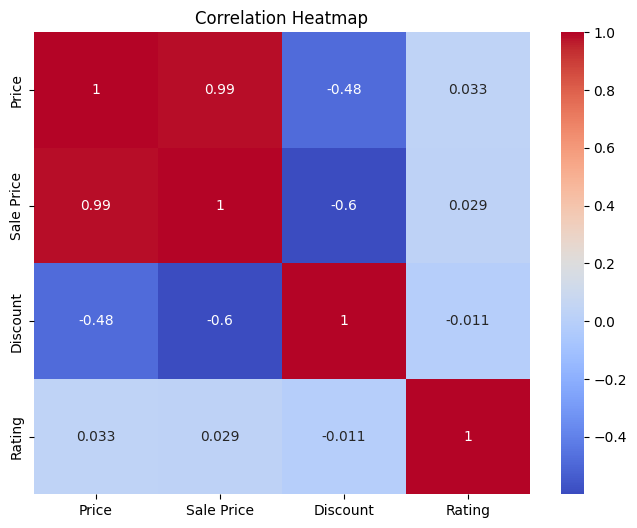

In [ ]:
# Correlation Analysis
corr = clean_oyo_rooms[['Price', 'Sale Price', 'Discount', 'Rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The visualization suggests that while most items have low to medium prices and ratings, there is not a clear linear correlation between price and rating. We can find low-priced items with both high and low ratings.

In [ ]:
# Distribution of price using plotly
fig = px.histogram(
    clean_oyo_rooms,
    x = 'Price',
    nbins = 20,
    title = 'Distribution of Price',
    labels = {
        'Price': 'Price'
    }
)

fig.show()

In [ ]:
# Distribution of sale price
fig = px.histogram(
    clean_oyo_rooms,
    x = 'Sale Price',
    nbins = 20,
    title = 'Distribution of Sale Price',
    labels = {
        'Sale Price': 'Sale Price'
    }
)

fig.show()

In [ ]:
# Sale Price vs Rating
fig = px.scatter(
    clean_oyo_rooms,
    x = 'Rating',
    y = 'Sale Price',
    # color = 'Location',
    title = 'Sale Price vs Rating',
    labels = {
        'Rating': 'Rating',
        'Sale Price': 'Sale Price'
    }
)

fig.show()

In [ ]:
# Discount vs Rating
fig = px.scatter(
    clean_oyo_rooms,
    x = 'Rating',
    y = 'Discount',
    # color = 'Location',
    title = 'Discount vs Rating',
    labels = {
        'Rating': 'Rating',
        'Discount': 'Discount'
    }
)

fig.show()

In [ ]:
# plotting Popularity
fig = px.histogram(
    clean_oyo_rooms,
    y = 'Popularity',
    title = 'Popularity',
    color = 'Popularity',
    labels = {
        'Popularity': 'Popularity'
    }
)

fig.show()

In [ ]:
# Popularity vs Sale Price
fig = px.violin(
    clean_oyo_rooms,
    x = 'Popularity',
    y = 'Sale Price',
    color = 'Popularity',
    title = 'Popularity vs Sale Price',
    labels = {
        'Popularity': 'Popularity',
        'Sale Price': 'Sale Price'
    }
)

fig.show()